<a href="https://colab.research.google.com/github/jamescp/python/blob/main/AnaliseCovid_Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise dos dados da pandemia de Covid-19 no Maranhão durante os anos de 2020 a 2022.**

Trabalho Final: Python para quem usa R.

Autor: Jamesson Amaral Gomes

email: jamesson.agomes@gmail.com

Fonte dos Dados: https://github.com/wcota/covid19br

Base de dados com números relacionados à COVID-19 no Brasil. Há dados de casos e óbitos por Estado, com informações oficiais do Ministério da Saúde, juntamente com os das Secretarias Estaduais de Saúde obtidos pelo Brasil.IO.

In [ ]:
pip install geobr

In [1]:
#import geobr as geo
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt # plotting data

%matplotlib inline



# **Leitura das Bases de Dados**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

In [3]:
#Transformação tipo da colunda data:
df['date'] = pd.to_datetime(df['date'])

#Seleciona somente o estado do Maranhão
dadosMA= df[df.state == "MA"]

In [4]:
#Visualização do conjunto de dos dados 
dadosMA.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
220,12,2020-03-20,Brazil,MA,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,12,2020-03-21,Brazil,MA,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,13,2020-03-22,Brazil,MA,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,13,2020-03-23,Brazil,MA,TOTAL,0,0,6,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,13,2020-03-24,Brazil,MA,TOTAL,0,0,0,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


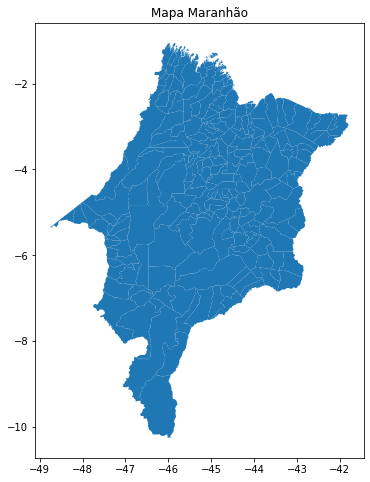

In [ ]:
#Mapa do Maranhão gerado com o pacote geobr
all_muni = geo.read_municipality(code_muni="MA", year=2010)
all_muni.plot(figsize=(12,8));
plt.title('Mapa Maranhão')
plt.show()


# **Casos e Óbitos atualizados do Maranhão.**

In [5]:
#Imprime dados atualizados dos Casos e Óbitos acumulados desde o início da pandemia no Maranhão.
print("Dados atualizados até:", dadosMA['date'].max())
print('Casos Totais MA:', dadosMA['newCases'].sum(),'\nÓbitos Totais MA:',dadosMA['newDeaths'].sum())

Dados atualizados até: 2022-09-05 00:00:00
Casos Totais MA: 469339 
Óbitos Totais MA: 10987


In [ ]:
#Cria as colunas  mes, meses-ano e ano
dadosMA['mes'] = dadosMA['date'].dt.strftime('%b')
dadosMA['meses'] = dadosMA['date'].dt.to_period('m')
dadosMA['ano'] = dadosMA['date'].dt.strftime('%Y')

In [7]:
table1 = dadosMA.groupby(['ano', 'meses','mes']).agg(
    casos = ("newCases", "sum"),
    obitos = ("newDeaths", "sum")
)
                         
table1

casos  obitos
ano  meses   mes               
2020 2020-03 Mar     51       1
     2020-04 Apr   3455     203
     2020-05 May  31791     772
     2020-06 Jun  45154    1072
     2020-07 Jul  40210     965
     2020-08 Aug  30954     433
     2020-09 Sep  21949     310
     2020-10 Oct  12263     297
     2020-11 Nov   7343     243
     2020-12 Dec   7768     204
2021 2021-01 Jan   6550     197
     2021-02 Feb  11819     355
     2021-03 Mar  23094    1018
     2021-04 Apr  24509    1206
     2021-05 May  23389     864
     2021-06 Jun  27147     903
     2021-07 Jul  19670     593
     2021-08 Aug  11948     395
     2021-09 Sep   7172     143
     2021-10 Oct   4841      63
     2021-11 Nov   3971      57
     2021-12 Dec   5597      83
2022 2022-01 Jan  15922     111
     2022-02 Feb  26309     302
     2022-03 Mar  12711      82
     2022-04 Apr   6995      11
     2022-05 May   5484       6
     2022-06 Jun   5175       7
     2022-07 Jul  16784      43
     2022-08 Aug   8752      47
     2022-09 Sep    562       1

In [ ]:
table1.to_csv ('/home/teste.csv')

#Curva de Casos Acumulados anos 2020 a 2022.

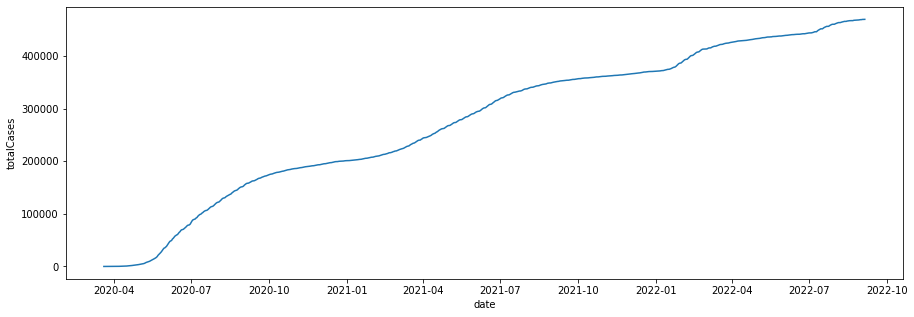

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot( data=dadosMA, x='date', y='totalCases');

#Curva de Casos anos 2021 e 2022.





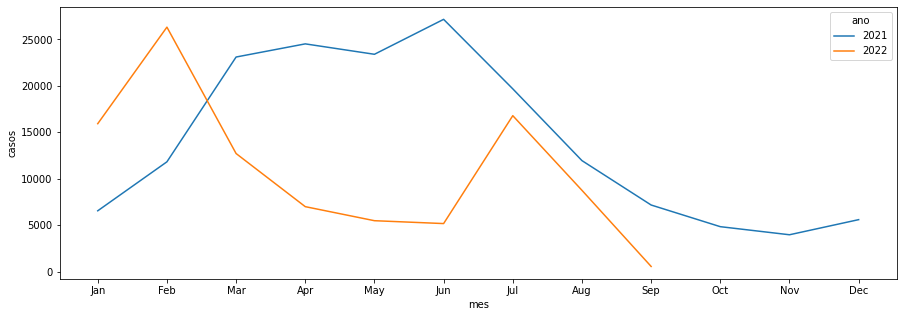

In [9]:
plt.figure(figsize=(15,5))
sns.lineplot(x='mes',y='casos',data=table1.query("ano in['2021','2022']"),   hue='ano');
plt.show()

#Curva de Óbitos anos 2021 e 2022.

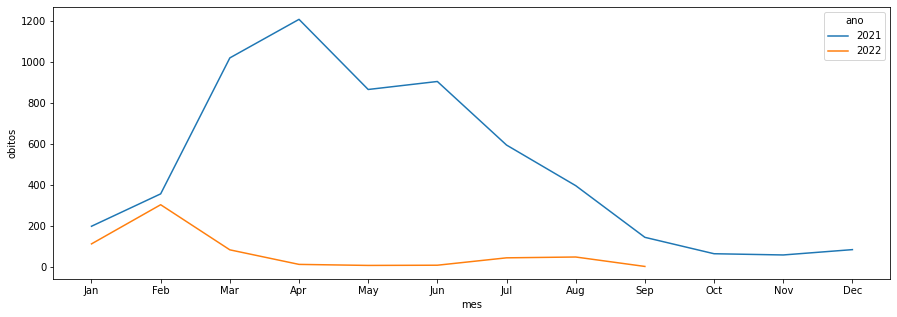

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(x='mes',y='obitos',data=table1.query("ano in['2021','2022']"),   hue='ano');
plt.show()

#Curva de Casos anos 2020 a 2022.

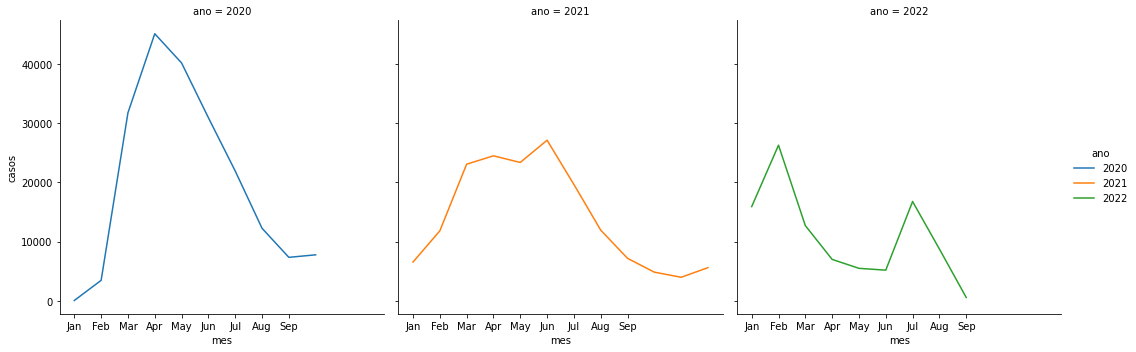

In [11]:
sns.relplot(x='mes', y='casos', data=table1.query("ano in['2020','2021','2022']"), kind = 'line', hue='ano', col = 'ano');


#Curva de Óbitos anos 2020 a 2022.

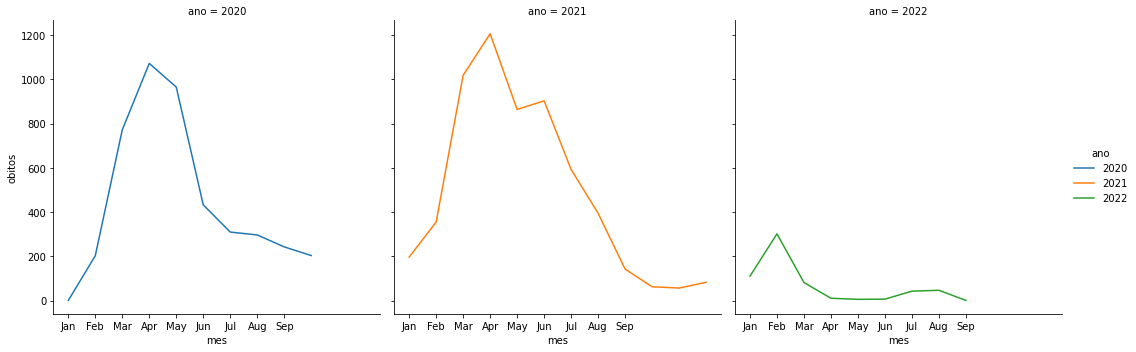

In [12]:
sns.relplot(x='mes', y='obitos', data=table1.query("ano in['2020','2021','2022']"), kind = 'line', hue='ano', sort = False, col = 'ano');


# **Obrigado pela visita!**